In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
NX=10
NY=15
w_i = np.array([4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36]) # weights
c_ai = np.array([[0, 1, 0, -1,  0, 1, -1, -1,  1],  # velocities, x components
              [0, 0, 1,  0, -1, 1,  1, -1, -1]]) # velocities, y components

In [3]:
#
rho_ij = np.ones((NX,NY))  # The measured scalar density field
u_cij  = np.zeros((2,NX,NY)) # The measured velocity field

In [4]:
f_inm=np.einsum('i,jk->ijk',w_i,np.ones((NX,NY))) # product of two arrays # 9x10x15

In [5]:
rho=np.einsum('ijk->jk',f_inm) # 10x15
rho

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

$u_{nm}=\sum_j c_j f_{jnm}/\rho_{nm}$

In [6]:
f=np.einsum('i,jk->ijk',w_i,np.ones((NX,NY))) # product of two arrays 9x10x15
eps=0.01
f[1,:,:]=f[1,:,:]+eps
f[2,:,:]=f[2,:,:]+eps
u_cij=np.einsum('ij,jkl->ikl',c_ai,f) # 2x10x15
u_cij

array([[[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
         0.01, 0.01, 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
         0.01, 0.01, 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
         0.01, 0.01, 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
         0.01, 0.01, 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
         0.01, 0.01, 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
         0.01, 0.01, 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
         0.01, 0.01, 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
         0.01, 0.01, 0.01, 0.01, 0.01],
        [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
         0.01, 0.01, 0.01, 0.01, 0.01],
        [0.01, 0.01

In [7]:
f[1]=np.roll(f[1],(0,1))

In [8]:
u_cij=np.einsum('ij,jkl->ikl',c_ai,f)
np.shape(u_cij)

(2, 10, 15)

In [9]:
f=np.einsum('i,jk->ijk',w_i,np.ones((NX,NY))) # product of two arrays

In [10]:
f_inm[:,5,5]=f[:,5,5]-eps

In [11]:
rho=np.einsum('ijk->jk',f)

In [12]:
rho.sum()

150.00000000000003

In [13]:
u_cij=np.einsum('ij,jkl->ikl',c_ai,f)

In [14]:
v=np.sin(2*np.pi*np.linspace(0,10,10)/10.)

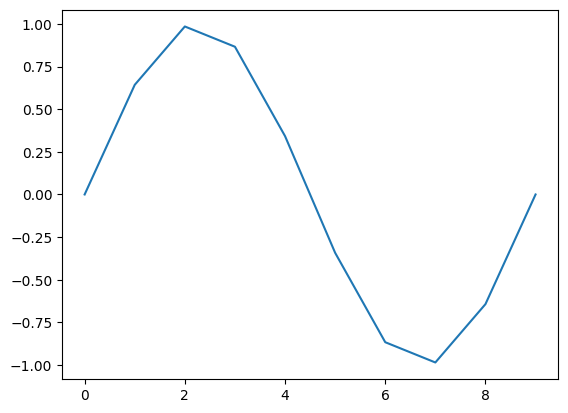

In [15]:
plt.plot(v)

In [16]:
v.shape

(10,)

In [17]:
u_new=np.zeros((2,NX,NY))
for i in np.arange(10):
    u_new[0,i,:]=u_cij[0,i,:]+v[i,np.newaxis]
    
np.shape(u_new)

(2, 10, 15)

In [18]:
# f

In [19]:
np.ones(10,dtype=int)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
1//3

0

In [21]:
#ar = np.zeros((NX,NY))
#ar[NX//2,NY//2] = 1.0
f_inm[5] = f_inm[5]*1.01
f_inm[7] = f_inm[7]*0.99

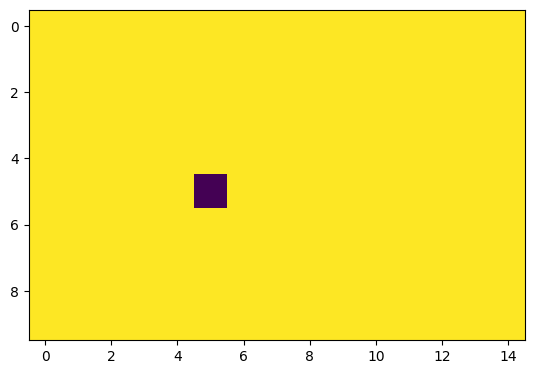

In [22]:
#%matplotlib inline
rho=np.einsum ('inm->nm',f_inm)
#rho[NX//2,NY//2] = 1.01
for i in np.arange(1,9):
    f_inm[i] = np.roll(f_inm[i], shift = c_ai.T[i], axis = [0,1])
#ar = np.roll(ar, shift = c_ai.T[5], axis = [0,1] )
#
fig, ax = plt.subplots()
ax.imshow(rho)
#ax.imshow(ar)
plt.show()

In [23]:
f_inm[:,NX//2,NY//2] = 1.01*f_inm[:,NX//2,NY//2]

In [24]:
f_inm[:,NX//2,NY//2] 

array([0.44888889, 0.11222222, 0.11222222, 0.11222222, 0.11222222,
       0.02833611, 0.02805556, 0.027775  , 0.02805556])

In [25]:
c_ai.T.shape

(9, 2)

In [26]:
av_anm = np.einsum('ia,inm->anm',c_ai.T,f_inm)
np.shape(av_anm)

(2, 10, 15)

In [27]:
np.einsum('a,anm->nm',c_ai.T[8],av_anm)

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.01,  0.02,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , -0.01,  0.  ,  0.01,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  , -0.02, -0.01,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0

In [28]:
ar_ij = np.zeros((NX,NY))
ar_ij[NX//2,NY//2] = 1.

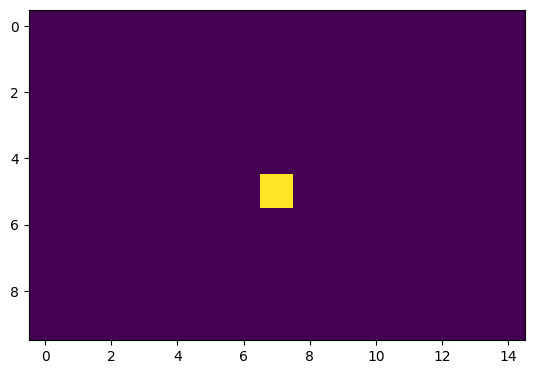

In [29]:
plt.imshow(ar_ij)
ar_ij = np.roll(ar_ij, shift = c_ai.T[5], axis = [0, 1])

In [30]:
c_ai.T[5]

array([1, 1])

In [31]:
rho_nm = np.einsum('inm->nm',f_inm)

In [32]:
rho_nm

array([[1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
        1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ],
       [1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
        1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ],
       [1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
        1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ],
       [1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ,
        1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ],
       [1.    , 1.    , 1.    , 1.    , 0.9901, 0.99  , 0.99  , 1.    ,
        1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ],
       [1.    , 1.    , 1.    , 1.    , 0.99  , 0.99  , 0.99  , 1.01  ,
        1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ],
       [1.    , 1.    , 1.    , 1.    , 0.99  , 0.99  , 0.9899, 1.    ,
        1.    , 1.    , 1.    , 1.    , 1.    , 1.    , 1.    ],
       [1.    , 1.    , 1.    , 1.    , 1

In [33]:
f_inm[5] = f_inm[5]*1.01
f_inm[7] = f_inm[7]*0.99

In [34]:
u_anm = np.einsum('ia,inm->anm',c_ai.T,f_inm)/rho_nm

In [35]:
np.einsum('a,anm->nm',c_ai.T[6],u_anm)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000

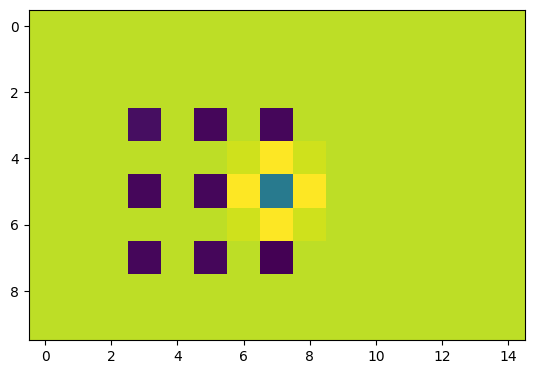

In [36]:
for i in np.arange(1,9):
    f_inm[i] = np.roll(f_inm[i], shift = c_ai.T[i], axis = [0, 1])
    
rho_nm = np.einsum('inm->nm',f_inm)
plt.imshow(rho_nm)

In [37]:
c_ai.T

array([[ 0,  0],
       [ 1,  0],
       [ 0,  1],
       [-1,  0],
       [ 0, -1],
       [ 1,  1],
       [-1,  1],
       [-1, -1],
       [ 1, -1]])

In [38]:
u_anm

array([[[ 0.00111111,  0.00111111,  0.00111111,  0.00111111,
          0.00111111,  0.00111111,  0.00111111,  0.00111111,
          0.00111111,  0.00111111,  0.00111111,  0.00111111,
          0.00111111,  0.00111111,  0.00111111],
        [ 0.00111111,  0.00111111,  0.00111111,  0.00111111,
          0.00111111,  0.00111111,  0.00111111,  0.00111111,
          0.00111111,  0.00111111,  0.00111111,  0.00111111,
          0.00111111,  0.00111111,  0.00111111],
        [ 0.00111111,  0.00111111,  0.00111111,  0.00111111,
          0.00111111,  0.00111111,  0.00111111,  0.00111111,
          0.00111111,  0.00111111,  0.00111111,  0.00111111,
          0.00111111,  0.00111111,  0.00111111],
        [ 0.00111111,  0.00111111,  0.00111111,  0.00111111,
          0.00111111,  0.00111111,  0.00111111,  0.00111111,
          0.00111111,  0.00111111,  0.00111111,  0.00111111,
          0.00111111,  0.00111111,  0.00111111],
        [ 0.00111111,  0.00111111,  0.00111111,  0.00111111,
          0